In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
test_dataset=pd.read_csv("student-mat.csv",sep=";")
df=pd.read_csv("student-por.csv",sep=";")
df.head()
test_dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [23]:
df.isnull().values.any()

False

In [24]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [25]:
#Creating Avg_grade by summing the grade points of respective subject 1,2,3 and then it will be used as the target variable
df['Avg_grade'] = (df['G1']+df['G2']+df['G3']) / 3
print(df.head())   
test_dataset['Avg_grade'] = (test_dataset['G1']+test_dataset['G2']+test_dataset['G3']) / 3
print(test_dataset.head())      

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  freetime goout  Dalc  Walc  health absences  G1  G2  G3  Avg_grade  
0        3     4     1     1       3        4   0  11  11   7.333333  
1        3     3     1     1       3        2   9  11  11  10.333333  
2        3     2     2     3       3        6  12  13  12  12.333333  
3        2     2     1     1       5        0  14  14  14  14.000000  
4        3     2     1     2       5        0  11  13  13  12.333333  

[5 rows x 34 columns]
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob  

In [26]:
#df.info()
categ_nom=['school', 'sex', 'address', 'famsize', 'Pstatus','Mjob', 'Fjob', 'reason', 'guardian','schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic']
categ_ord=['Medu', 'Fedu','famrel', 'freetime', 'goout', 'Dalc','Walc', 'health']
conti=['age','traveltime', 'studytime','failures', 'absences', 'G1', 'G2', 'G3','Avg_grade']

In [27]:
#Feature engineering - converting categorical nominal variables text values into numerical values
from sklearn.preprocessing import LabelEncoder
#encoder=LabelEncoder() putting encoder inside the loop so that its value is reset for each feature
for i in categ_nom:
    encoder=LabelEncoder()
    df[i]=encoder.fit_transform(df[i])
    test_dataset[i]=encoder.fit_transform(test_dataset[i])
    

In [28]:
print(df.guardian.values) #checking proper encoding
print(df.head())
print(test_dataset.head())

[1 0 1 1 0 1 1 1 1 1 1 0 0 1 2 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 2 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1
 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 2 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 2 1 2 1 1
 1 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 2 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0
 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 2 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 2 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 2 1 0
 1 1 1 2 0 1 1 1 1 1 1 1 1 0 1 1 2 1 0 0 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 2 0 1 1 1 1 0 1 1 1 0 1 2 0 1 1 1 1 1 1 1 0 0 0 1 2 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 2 2 0 1 1 0 1 1 0 1 2 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 2
 2 1 1 1 0 0 1 1 1 1 1 1 1 1 2 1 0 1 1 2 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 2 1
 2 1 2 1 1 1 2 2 2 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0
 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 2
 1 1 0 1 1 0 2 1 1 1 2 1 

In [29]:
#storing all categorical features into a single variable as encoding has been done
categ_ord.extend(categ_nom)
categ=categ_ord
categ

['Medu',
 'Fedu',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

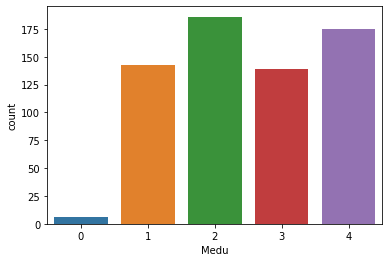

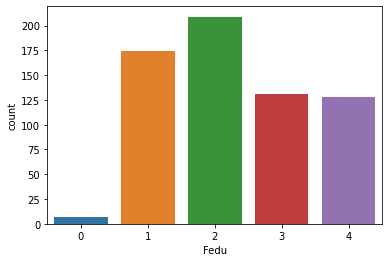

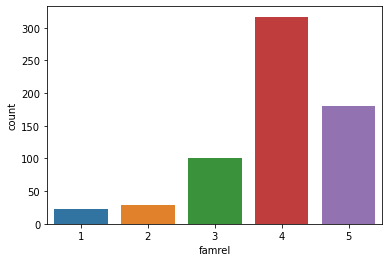

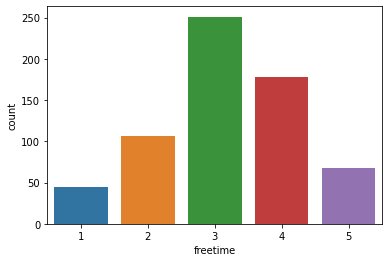

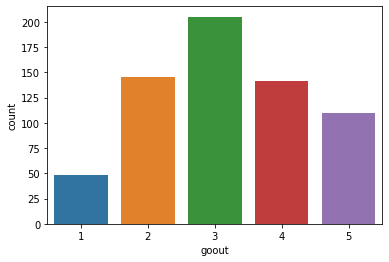

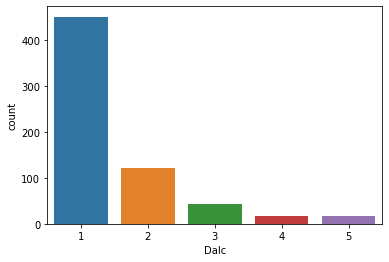

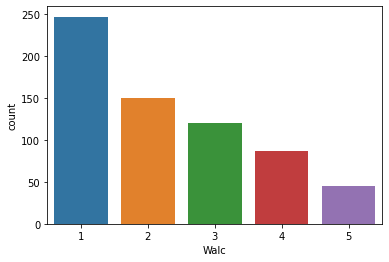

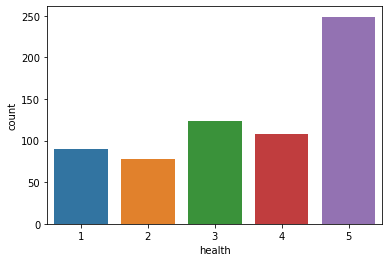

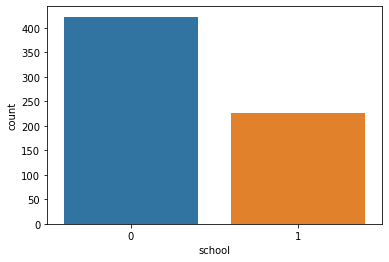

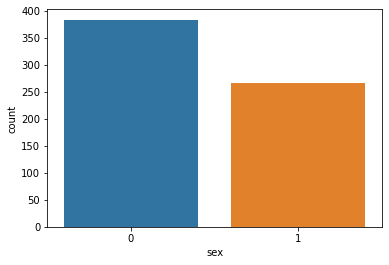

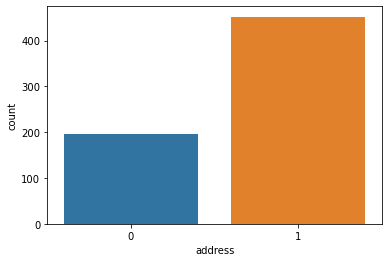

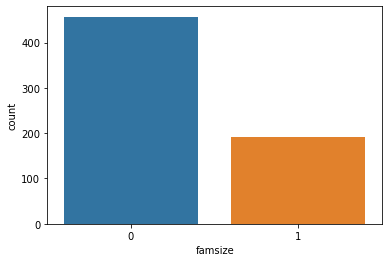

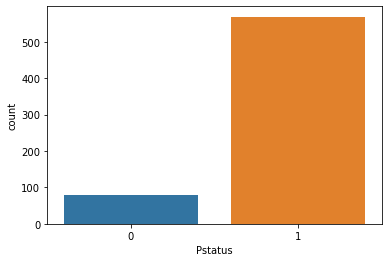

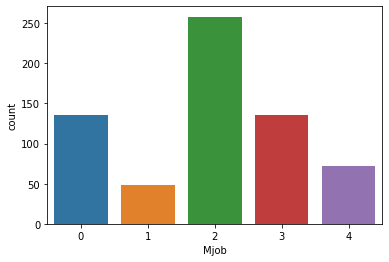

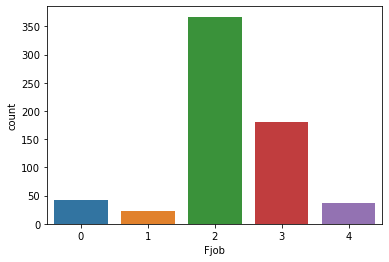

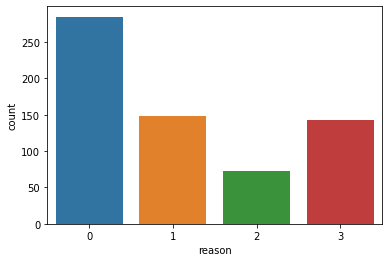

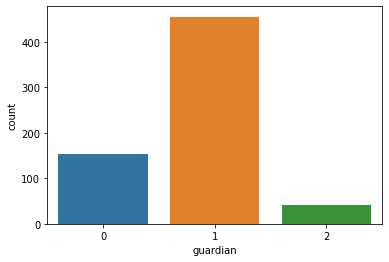

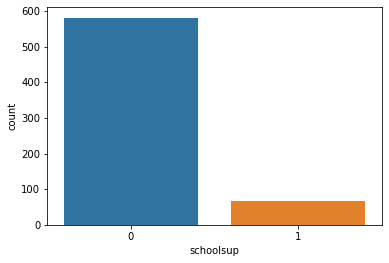

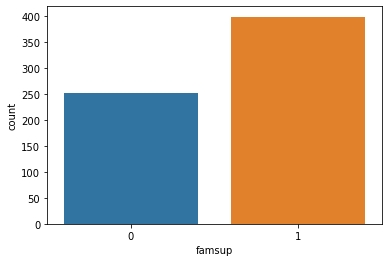

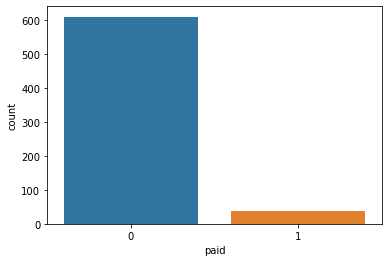

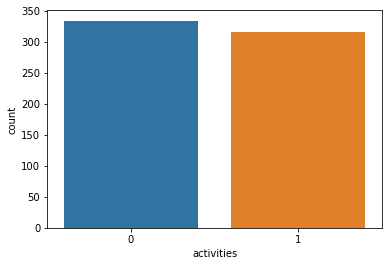

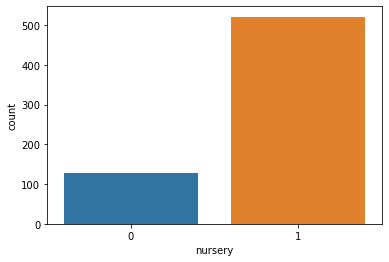

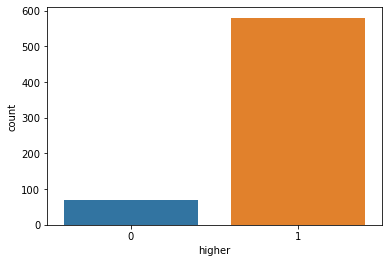

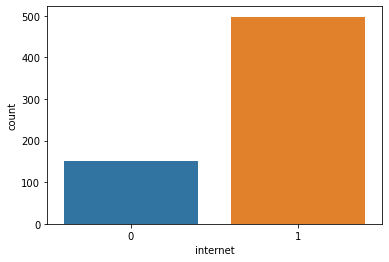

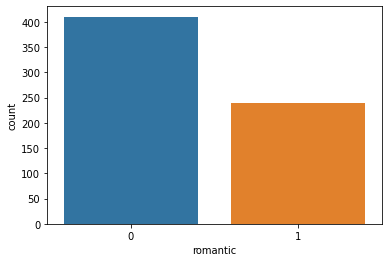

In [30]:
#Univariate EDA
for i in categ:
    sns.countplot(x=i,data=df)
    plt.show()


C:\Users\hotav\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


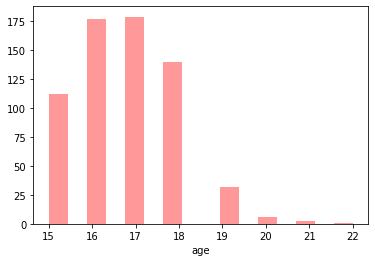

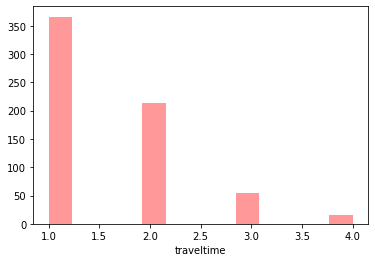

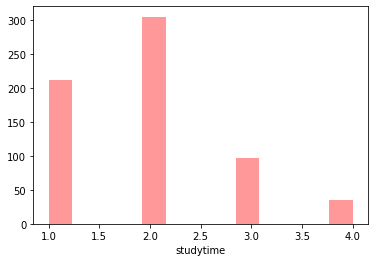

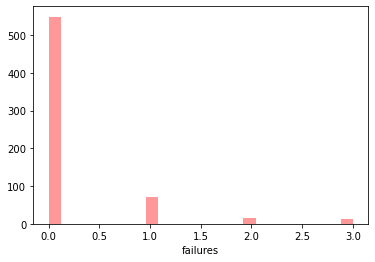

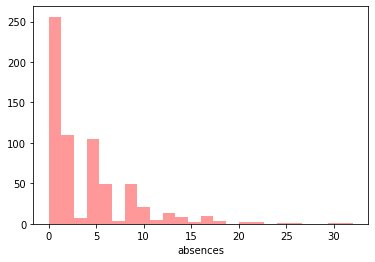

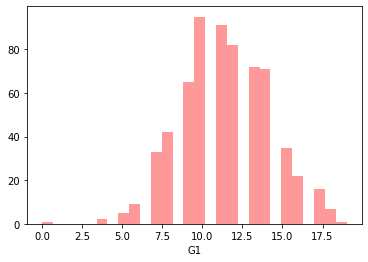

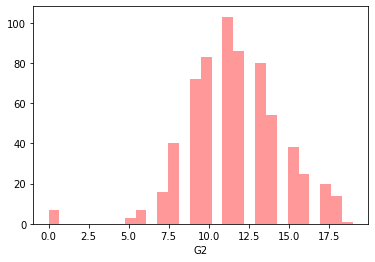

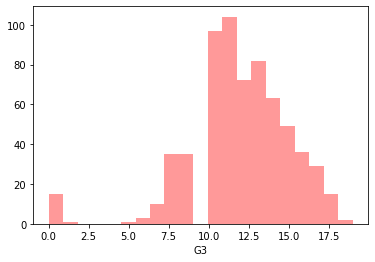

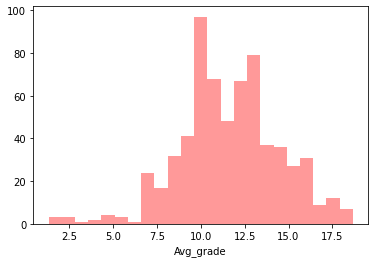

In [31]:
for i in conti:
    sns.distplot(df[i],kde=False,color='r')
    plt.show()

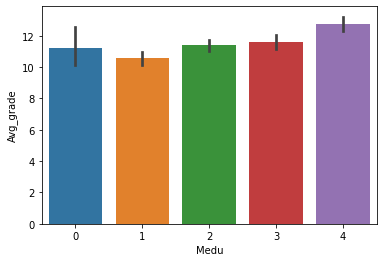

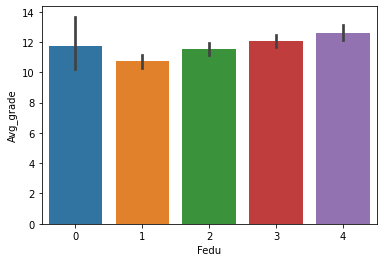

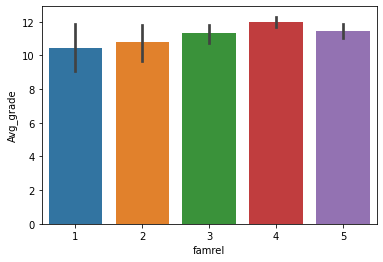

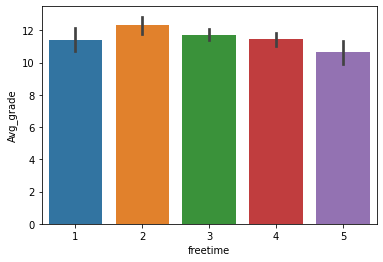

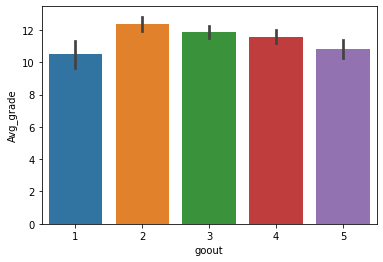

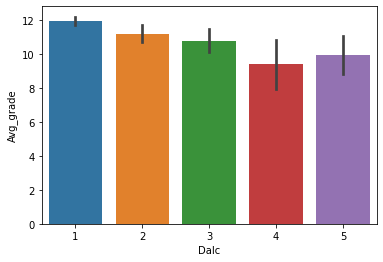

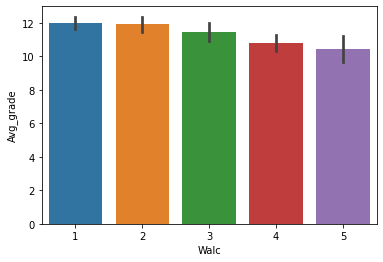

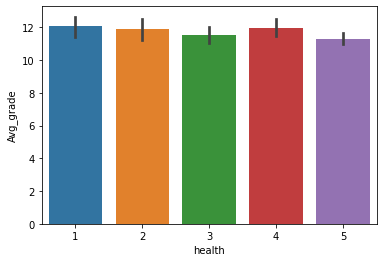

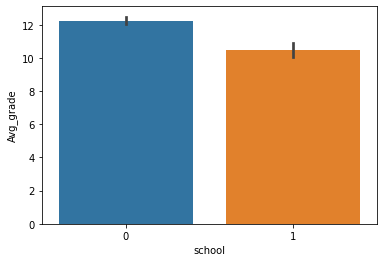

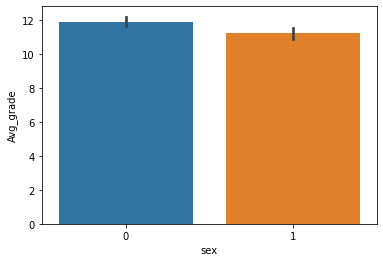

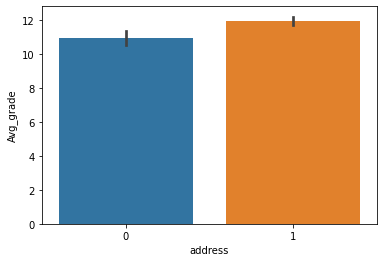

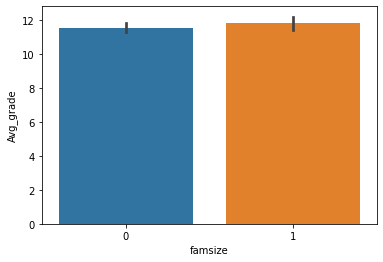

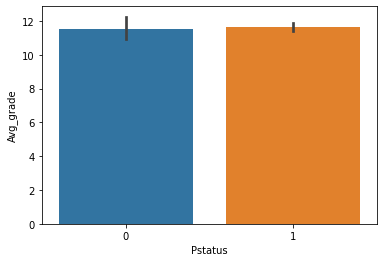

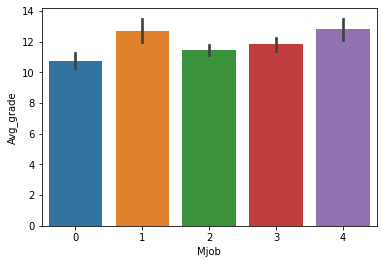

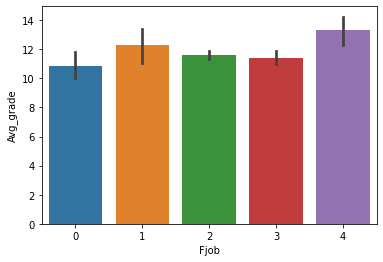

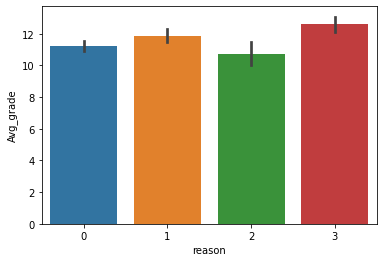

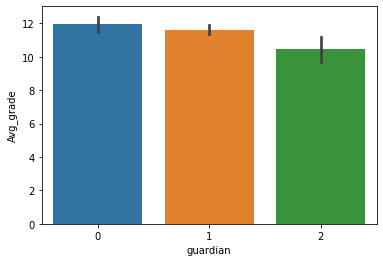

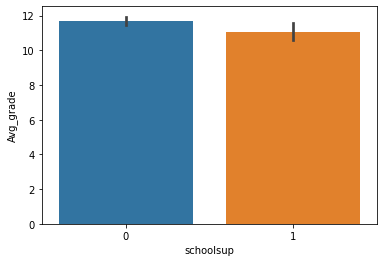

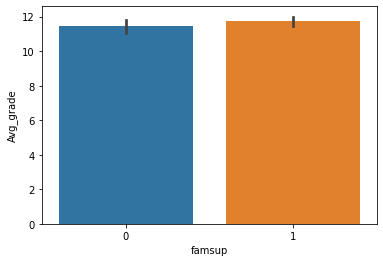

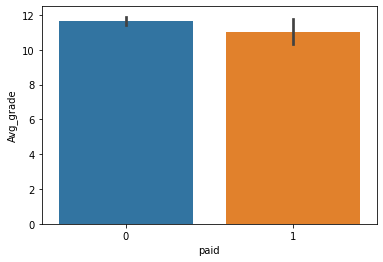

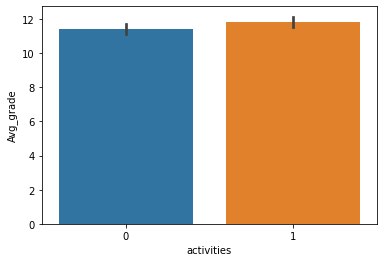

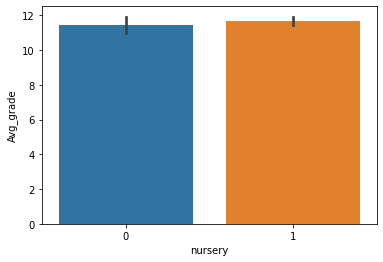

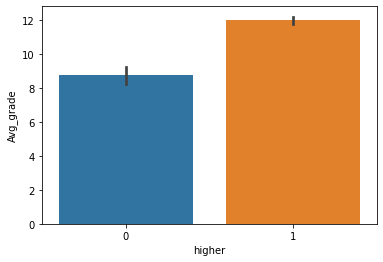

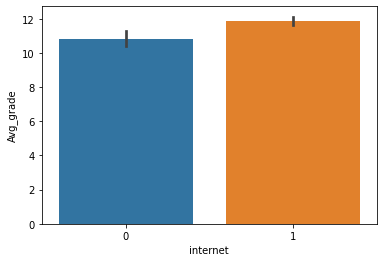

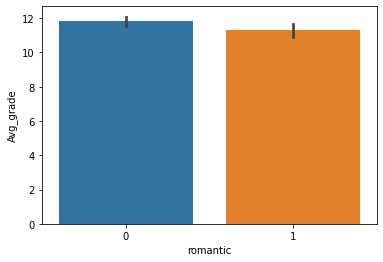

In [32]:
for i in categ:
    sns.barplot(x=i,y='Avg_grade',data=df)
    plt.show()

In [33]:
#From the EDA above,it seems that school and age doesn't seem to have any patterned effect to the grade,and the other features have effect on the grade in tandem with other variables with variations of slight differences everytime
#we will use linear regression to predict average grade

In [54]:
x=df.drop(['school','age','Avg_grade','G1','G2','G3'],axis=1)
print(x.head()) #x are features
x_dataset=test_dataset.drop(['school','age','Avg_grade','G1','G2','G3'],axis=1)
print(x_dataset.head()) #x are features

   sex  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  reason  guardian  \
0    0        1        0        0     4     4     0     4       0         1   
1    0        1        0        1     1     1     0     2       0         0   
2    0        1        1        1     1     1     0     2       2         1   
3    0        1        0        1     4     2     1     3       1         1   
4    0        1        0        1     3     3     2     2       1         0   

   ...  higher  internet  romantic  famrel  freetime  goout  Dalc  Walc  \
0  ...       1         0         0       4         3      4     1     1   
1  ...       1         1         0       5         3      3     1     1   
2  ...       1         1         0       4         3      2     2     3   
3  ...       1         1         1       3         2      2     1     1   
4  ...       1         0         0       4         3      2     1     2   

   health  absences  
0       3         4  
1       3         2  
2       

In [55]:
y=df['Avg_grade']
print(y.head)  #y has target variable/label
y_dataset=test_dataset['Avg_grade']
print(y_dataset)

<bound method NDFrame.head of 0       7.333333
1      10.333333
2      12.333333
3      14.000000
4      12.333333
         ...    
644    10.333333
645    15.333333
646    10.666667
647    10.000000
648    10.666667
Name: Avg_grade, Length: 649, dtype: float64>
0       5.666667
1       5.333333
2       8.333333
3      14.666667
4       8.666667
         ...    
390     9.000000
391    15.333333
392     8.333333
393    11.000000
394     8.666667
Name: Avg_grade, Length: 395, dtype: float64


In [56]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8)
print(x.shape)
print(y.shape)

(649, 28)
(649,)


In [57]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(519, 28)
(519,)
(130, 28)
(130,)


In [58]:
from sklearn.linear_model import LinearRegression
algo=LinearRegression()

In [59]:
algo.fit(xtrain,ytrain)

LinearRegression()

In [60]:
ypred=algo.predict(xtest)
ypred_dataset=algo.predict(x_dataset)

In [62]:
from sklearn.metrics import mean_absolute_error
mae1=mean_absolute_error(ytest,ypred)
mae2=mean_absolute_error(y_dataset,ypred_dataset)
print(mae1) #using training and testing splits of the original data 
print(mae2)

1.6099670834146043
2.7379488223502326


In [63]:
algo.intercept_  # c value

8.914298134670975

In [64]:
algo.coef_  # m1,m2,m3,m4 values

array([-0.2731642 ,  0.57548024,  0.13775175,  0.26742005,  0.19001194,
        0.13974072,  0.05876458,  0.10023514,  0.16212584, -0.01949801,
       -0.08656909,  0.4566266 , -1.13268653, -1.05040706, -0.13528766,
       -0.62275599,  0.28480623, -0.2667138 ,  1.62012731,  0.30083251,
       -0.4032448 ,  0.17344759, -0.12212141, -0.05344135, -0.26651751,
       -0.07933122, -0.08562744, -0.02071886])

In [ ]:
#mae is very less(3.105) therefore our model is performing very good therefore its perfect